### Imports

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             RocCurveDisplay)

from joblib import dump, load

### Grab Data

In [50]:
# Create a funtion that takes in a filepath and returns a dataframe
def return_dataframe(filepath: str) -> pd.DataFrame:
    """ Return a dataframe from a given filepath. """
    return pd.read_csv(filepath)

# Run `return_dataframe()`

# Agriculture: 
# (feeder cattle, lean hog, live cattle, corn, soybean oil, soybean meal, soybeans, wheat)
# 8 total
gf = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\GF_Day1.csv')
he = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\HE_Day1.csv')
le = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\LE_Day1.csv')
zc = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZC_Day1.csv')
zl = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZL_Day1.csv')
zm = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZM_Day1.csv')
zs = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZS_Day1.csv')
zw = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZW_Day1.csv')

# Bonds:
# (schatz, bobl, bund, buxl, 2yr, 5yr, 10yr, ultra 10yr, 30yr, ultra 30yr)
# 10 total
fgbs = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\FGBS_Day1.csv')
fgbm = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\FGBM_Day1.csv')
fgbl = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\FGBL_Day1.csv')
fgbx = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\FGBX_Day1.csv')
zt = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZT_Day1.csv')
zf = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZF_Day1.csv')
zn = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZN_Day1.csv')
tn = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\TN_Day1.csv')
zb = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ZB_Day1.csv')
ub = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\UB_Day1.csv')

# Crude:
# (brent, wti light, heating oil, gasoline)
# 4 total
b = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\B_Day1.csv')
cl = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\CL_Day1.csv')
ho = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\HO_Day1.csv')
rb = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\RB_Day1.csv')

# Currencies:
# (aussie, pound, canadian, euro, yen, peso, new zealand, franc, us)
# 9 total
six_a = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6A_Day1.csv')
six_b = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6B_Day1.csv')
six_c = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6C_Day1.csv')
six_e = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6E_Day1.csv')
six_j = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6J_Day1.csv')
six_m = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6M_Day1.csv')
six_n = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6N_Day1.csv')
six_s = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\6S_Day1.csv')
dx = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\DX_Day1.csv')

# Equity Index:
# (dax, euro stoxx, s&p, nasdaq, russel, dow)
# 6 total
fdax = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\FDAX_Day1.csv')
fesx = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\FESX_Day1.csv')
es = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\ES_Day1.csv')
nq = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\NQ_Day1.csv')
rty = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\RTY_Day1.csv')
ym = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\YM_Day1.csv')

# Metals:
# (gold, copper, silver)
# 3 total
gc = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\GC_Day1.csv')
hg = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\HG_Day1.csv')
si = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\SI_Day1.csv')

# Natural Gas
# (natural gas)
# 1 total
ng = return_dataframe(r'C:\Users\Brian\Desktop\PriceData\Vault\Day1\NG_Day1.csv')

# Total instruments: 41

In [51]:
# group instruments into parent lists
# group instruments into a top parent list
agriculture = [gf, he, le, zc, zl, zm, zs, zw]
bonds = [fgbs, fgbm, fgbl, fgbx, zt, zf, zn, tn, zb, ub]
crude = [b, cl, ho, rb]
currencies = [six_a, six_b, six_c, six_e, six_j, six_m, six_n, six_s, dx]
equity_index = [fdax, fesx, es, nq, rty, ym]
metals = [gc, hg, si]
natural_gas = [ng]

all_instruments = [agriculture, bonds, crude, currencies, equity_index, metals, natural_gas]

### EDA

In [52]:
# Create a funtion to check for nan values
def check_nan(df: pd.DataFrame):
    """ Check for NaN values. """
    if df.isnull().values.any():
        print('There is missing data.')
        
# Run `check_nan()`
for group in all_instruments:
    for df in group:
        check_nan(df)

In [53]:
# Create a function to remove m/s/ms from 'Time' and change 'Time' from an *object* to a *timeseries*
def time_object_to_timeseries(df: pd.DataFrame) -> pd.DataFrame:
    """ Remove M/S/MS from 'Time' and convert into datetime. """
    df['Time'] = [x[:-11] for x in df['Time']]
    df['Time'] = pd.to_datetime(df['Time'])
    
    return df

# Run `time_object_to_timeseries()`
for group in all_instruments:
    for df in group:
        time_object_to_timeseries(df)

### Visualize

In [54]:
# Checking all charts for jumps in data or erroneous price action
# If there are jumps, remove data (typically it only happens early on)
# Unsure how erroneous price action occurs, maybe someone got unlucky/lucky on a fill

In [55]:
# Create function to plot dataframes as candlestick charts
def plot_candlestick_chart(df: pd.DataFrame, instrument: str) -> plotly.graph_objs.Figure:
    fig = go.Figure(data=[go.Candlestick(x=df['Time'],
                                         open=df['Open'],
                                         high=df['High'],
                                         low=df['Low'],
                                         close=df['Close'],
                                         increasing_line_color='steelblue', 
                                         decreasing_line_color='steelblue')])

    fig.update_layout(xaxis_rangeslider_visible=False, 
                      title=instrument, title_x=0.5,
                      yaxis_title='Price',
                      xaxis_title='Time',
                      template='plotly_dark')

    # fig.show() to view
    return fig 

# Run `plot_candlestick_chart()`

# Agriculture
gf_chart = plot_candlestick_chart(gf, 'GF')
he_chart = plot_candlestick_chart(he, 'HE')
le_chart = plot_candlestick_chart(le, 'LE')
zc_chart = plot_candlestick_chart(zc, 'ZC')
zl_chart = plot_candlestick_chart(zl, 'ZL')
zm_chart = plot_candlestick_chart(zm, 'ZM')
zs_chart = plot_candlestick_chart(zs, 'ZS')
zw_chart = plot_candlestick_chart(zw, 'ZW')

# Bonds
fgbs_chart = plot_candlestick_chart(fgbs, 'FGBS')
fgbm_chart = plot_candlestick_chart(fgbm, 'FGBM')
fgbl_chart = plot_candlestick_chart(fgbl, 'FGBL')
fgbx_chart = plot_candlestick_chart(fgbx, 'FGBX')
zt_chart = plot_candlestick_chart(zt, 'ZT')
zf_chart = plot_candlestick_chart(zf, 'ZF')
zn_chart = plot_candlestick_chart(zn, 'ZN')
tn_chart = plot_candlestick_chart(tn, 'TN')
zb_chart = plot_candlestick_chart(zb, 'ZB')
ub_chart = plot_candlestick_chart(ub, 'UB')

# Crude
b_chart = plot_candlestick_chart(b, 'B')
cl_chart = plot_candlestick_chart(cl, 'CL')
ho_chart = plot_candlestick_chart(ho, 'HO')
rb_chart = plot_candlestick_chart(rb, 'RB')

# Currencies
six_a_chart = plot_candlestick_chart(six_a, '6A')
six_b_chart = plot_candlestick_chart(six_b, '6B')
six_c_chart = plot_candlestick_chart(six_c, '6C')
six_e_chart = plot_candlestick_chart(six_e, '6E')
six_j_chart = plot_candlestick_chart(six_j, '6J')
six_m_chart = plot_candlestick_chart(six_m, '6M')
six_n_chart = plot_candlestick_chart(six_n, '6N')
six_s_chart = plot_candlestick_chart(six_s, '6S')
dx_chart = plot_candlestick_chart(dx, 'DX')

# Equity Index
fdax_chart = plot_candlestick_chart(fdax, 'FDAX')
fesx_chart = plot_candlestick_chart(fesx, 'FESX')
es_chart = plot_candlestick_chart(es, 'ES')
nq_chart = plot_candlestick_chart(nq, 'NQ')
rty_chart = plot_candlestick_chart(rty, 'RTY')
ym_chart = plot_candlestick_chart(ym, 'YM')


# Metals
gc_chart = plot_candlestick_chart(gc, 'GC')
hg_chart = plot_candlestick_chart(hg, 'HG')
si_chart = plot_candlestick_chart(si, 'SI')

# Natural Gas
ng_chart = plot_candlestick_chart(ng, 'NG')

In [56]:
# Testing each individually, not going to store all charts

# Charts that are missing data:
    # zc
    # zl
    # zm
    # zs
    # zw
    # rb
    # gc
    # si
    
# Charts that have erroneous data
    # zb
    # fdax
    # fesx

# Charts that are missing data and have erroneous data
    # fgbs
    # fgbm
    # fgbl
    # fgbx

### Cleansing

In [57]:
# zc: remove all data prior to - nov 11 2009
# zl: remove all data prior to - nov 11 2009
# zm: remove all data prior to - nov 11 2009
# zs: remove all data prior to - oct 12 2009
# zw: remove all data prior to - nov 11 2009
# rb: remove all data prior to - jun 23 2014
# gc: remove all data prior to - oct 13 2009
# si: remove all data prior to - oct 7 2009
# zb: remove all data prior to - aug 31 2009
# fdax: remove all data prior to - dec 31 2010
# fesx: remove all data prior to - mar 7 2011
# fgbs: remove all data prior to - dec 31 2010, 
        # on (oct 1 2021, change low/close to open/high)
# fgbm: remove all data prior to - dec 31 2010, 
        # on (oct 13 2017, change low to open), 
        # on (oct 1 2021, change high/close to open)
# fgbl: remove all data prior to - dec 31 2010
# fgbx: remove all data prior to - oct 19 2015,
        # on (apr 14 2021, change low/close to open), 
        # on (oct 1 2021, change low/close to open)
        
# Going to create 1 function and manually fix the others
    # 'date' parameter which removes all data prior to date
        # [zc, zl, zm, zs, zw, rb, gc, si, zb, fdax, fesx, fgbl]
        # others = [fgbs, fgbm, fgbx]

In [58]:
# Create a function to remove data prior to a certain date
def start_chart_from_date(df: pd.DataFrame, date: str) -> pd.DataFrame:
    """ Start a chart of price data from a certain date. """
    df = df[~(df['Time'] < date)]
    return df

# Run `start_chart_from_date`

zc = start_chart_from_date(zc, '2009-11-11')
zl = start_chart_from_date(zl, '2009-11-11')
zm = start_chart_from_date(zm, '2009-11-11')
zs = start_chart_from_date(zs, '2009-10-12')
zw = start_chart_from_date(zw, '2009-11-11')
rb = start_chart_from_date(rb, '2014-06-23')
gc = start_chart_from_date(gc, '2009-10-13')
si = start_chart_from_date(si, '2009-10-07')
zb = start_chart_from_date(zb, '2009-08-31')
fdax = start_chart_from_date(fdax, '2010-12-31')
fesx = start_chart_from_date(fesx, '2011-03-07')
fgbl = start_chart_from_date(fgbl, '2010-12-31')

fgbs = start_chart_from_date(fgbs, '2010-12-31')
fgbm = start_chart_from_date(fgbm, '2010-12-31')
fgbx = start_chart_from_date(fgbx, '2015-10-19')

# Manual Changes

fgbs.loc[3143, 'Low'] = fgbs.loc[3143]['Open']
fgbs.loc[3143, 'Close'] = fgbs.loc[3143]['Open']

fgbm.loc[2136, 'Low'] = fgbm.loc[2136]['Open']
fgbm.loc[3143, 'High'] = fgbm.loc[3143]['Open']
fgbm.loc[3143, 'Close'] = fgbm.loc[3143]['Open']

fgbx.loc[1572, 'Low'] = fgbx.loc[1572]['Open']
fgbx.loc[1572, 'Close'] = fgbx.loc[1572]['Open']
fgbx.loc[1694, 'Low'] = fgbx.loc[1694]['Open']
fgbx.loc[1694, 'Close'] = fgbx.loc[1694]['Open']

In [59]:
# Reset charts of the instruments that were fixed - Run `plot_candlestick_chart()`

# Agriculture (fixes)
zc_chart = plot_candlestick_chart(zc, 'ZC')
zl_chart = plot_candlestick_chart(zl, 'ZL')
zm_chart = plot_candlestick_chart(zm, 'ZM')
zs_chart = plot_candlestick_chart(zs, 'ZS')
zw_chart = plot_candlestick_chart(zw, 'ZW')

# Bonds (fixes)
fgbs_chart = plot_candlestick_chart(fgbs, 'FGBS')
fgbm_chart = plot_candlestick_chart(fgbm, 'FGBM')
fgbl_chart = plot_candlestick_chart(fgbl, 'FGBL')
fgbx_chart = plot_candlestick_chart(fgbx, 'FGBX')

# Crude
rb_chart = plot_candlestick_chart(rb, 'RB')

# Equity Index (fixes)
fdax_chart = plot_candlestick_chart(fdax, 'FDAX')
fesx_chart = plot_candlestick_chart(fesx, 'FESX')
zb_chart = plot_candlestick_chart(zb, 'ZB')

# Metals (fixes)
gc_chart = plot_candlestick_chart(gc, 'GC')
si_chart = plot_candlestick_chart(si, 'SI')

### Feature Engineering

In [60]:
# Unsure why this has to be done again...
# All the instruments that were manually changed are no longer in the lists

# group instruments into parent lists
# group instruments into a top parent list
agriculture = [gf, he, le, zc, zl, zm, zs, zw]
bonds = [fgbs, fgbm, fgbl, fgbx, zt, zf, zn, tn, zb, ub]
crude = [b, cl, ho, rb]
currencies = [six_a, six_b, six_c, six_e, six_j, six_m, six_n, six_s, dx]
equity_index = [fdax, fesx, es, nq, rty, ym]
metals = [gc, hg, si]
natural_gas = [ng]

all_instruments = [agriculture, bonds, crude, currencies, equity_index, metals, natural_gas]

In [61]:
# Create a column denoting where the session finished.
def up_or_down_session(df: pd.DataFrame) -> pd.DataFrame:
    """ Create a column denoting if sessions were Up/ or Down. """
    df['Up_or_Down_Session'] = df['Close'] - df['Open']
    df['Up_or_Down_Session'] = [1 if x >= 0 else 0 for x in df['Up_or_Down_Session'].iloc]

    return df

# Run `up_or_down_session()`
for group in all_instruments:
    for df in group:
        up_or_down_session(df)

In [62]:
# Create columns showing closing price of current session versus closing price of prior sessions.
def up_or_down_vs_prior_session(df: pd.DataFrame) -> pd.DataFrame:
    """ Create a column denoting if sessions were Up or Down compared to prior sessions """
    
    df['Session_vs_Prior1'] = df['Close'] > df['Close'].shift(1)
    df['Session_vs_Prior2'] = df['Close'] > df['Close'].shift(2)
    df['Session_vs_Prior5'] = df['Close'] > df['Close'].shift(5)
    df['Session_vs_Prior10'] = df['Close'] > df['Close'].shift(10)
    df['Session_vs_Prior20'] = df['Close'] > df['Close'].shift(20)
    
    df[['Session_vs_Prior1',
        'Session_vs_Prior2',
        'Session_vs_Prior5',
        'Session_vs_Prior10', 
        'Session_vs_Prior20']] = df[['Session_vs_Prior1',
                                     'Session_vs_Prior2',
                                     'Session_vs_Prior5',
                                     'Session_vs_Prior10', 
                                     'Session_vs_Prior20']].applymap(int)

    return df

# Run `up_or_down_vs_session()`
for group in all_instruments:
    for df in group:
        up_or_down_vs_prior_session(df)

In [63]:
# Create a range column
def create_range(df: pd.DataFrame) -> pd.DataFrame:
    """ Create a column holding the range for the session. """
    df['Range'] = [x['High'] - x['Low'] for x in df.iloc]

    return df

# Run `create_range()`
for group in all_instruments:
    for df in group:
        create_range(df)

In [64]:
# Create a percent range column
def create_range_percent(df: pd.DataFrame) -> pd.DataFrame:
    """ Create a column holding the range for the session based on percentage of instrument price. """
    df['Range_Percent'] = [x['Range'] / x['Close'] for x in df.iloc]

    return df

# Run `create_range_percent()`
for group in all_instruments:
    for df in group:
        create_range_percent(df)

In [65]:
# Create range averages columns
def create_range_averages(df: pd.DataFrame) -> pd.DataFrame:
    """ Create columns holding the average range for given time periods. """
    df['Avg_2d_Range'] = df.rolling(2)['Range'].mean()
    df['Avg_5d_Range'] = df.rolling(5)['Range'].mean()
    df['Avg_10d_Range'] = df.rolling(10)['Range'].mean()
    df['Avg_20d_Range'] = df.rolling(20)['Range'].mean()
    
    return df
    
# Run `create_range_averages()`
for group in all_instruments:
    for df in group:
        create_range_averages(df)

In [66]:
# Create rolling [low & high & close]
def create_rolling_low_high_close(df: pd.DataFrame) -> pd.DataFrame:
    """ Create a rolling low & high & close. """
    df['2d_Low'] = df['Low'].rolling(2).min()
    df['5d_Low'] = df['Low'].rolling(5).min()
    df['10d_Low'] = df['Low'].rolling(10).min()
    df['20d_Low'] = df['Low'].rolling(20).min()
    
    df['2d_High'] = df['High'].rolling(2).min()
    df['5d_High'] = df['High'].rolling(5).min()
    df['10d_High'] = df['High'].rolling(10).min()
    df['20d_High'] = df['High'].rolling(20).min()
    
    df['2d_Avg_Close'] = df['Close'].rolling(2).mean()
    df['5d_Avg_Close'] = df['Close'].rolling(5).mean()
    df['10d_Avg_Close'] = df['Close'].rolling(10).mean()
    df['20d_Avg_Close'] = df['Close'].rolling(20).mean()
    
    return df
    
# Run `create_rolling_low_high_close()`
for group in all_instruments:
    for df in group:
        create_rolling_low_high_close(df)

In [67]:
# # Create rolling [4 quartiles]
# def create_rolling_4_quartiles(df: pd.DataFrame) -> pd.DataFrame:
#     """ Create a rolling 4 quartiles """
#     df['2d_q1'] = np.percentile(list([df['2d_Min'], df['2d_Max']]), 25)
#     df['5d_q1'] = np.percentile(list([df['5d_Min'], df['5d_Max']]), 25)
#     df['10d_q1'] = np.percentile(list([df['10d_Min'], df['10d_Max']]), 25)
#     df['20d_q1'] = np.percentile(list([df['20d_Min'], df['20d_Max']]), 25)
    
#     df['2d_q2'] = np.percentile(list([df['2d_Min'], df['2d_Max']]), 50)
#     df['5d_q2'] = np.percentile(list([df['5d_Min'], df['5d_Max']]), 50)
#     df['10d_q2'] = np.percentile(list([df['10d_Min'], df['10d_Max']]), 50)
#     df['20d_q2'] = np.percentile(list([df['20d_Min'], df['20d_Max']]), 50)
    
#     df['2d_q3'] = np.percentile(list([df['2d_Min'], df['2d_Max']]), 75)
#     df['5d_q3'] = np.percentile(list([df['5d_Min'], df['5d_Max']]), 75)
#     df['10d_q3'] = np.percentile(list([df['10d_Min'], df['10d_Max']]), 75)
#     df['20d_q3'] = np.percentile(list([df['20d_Min'], df['20d_Max']]), 75)
    
#     return df
    
# # Run `create_rolling_4_quartiles()`
# for group in all_instruments:
#     for df in group:
#         create_rolling_4_quartiles(df)

In [72]:
# Create rolling [4 quartiles]
def create_rolling_4_quartiles(df: pd.DataFrame) -> pd.DataFrame:
    """ Create a rolling 4 quartiles """
    df['2d_q1'] = [np.percentile(list([x['2d_Low'], x['2d_High']]), 25) for x in df.iloc]
    df['5d_q1'] = [np.percentile(list([x['5d_Low'], x['5d_High']]), 25) for x in df.iloc]
    df['10d_q1'] = [np.percentile(list([x['10d_Low'], x['10d_High']]), 25) for x in df.iloc]
    df['20d_q1'] = [np.percentile(list([x['20d_Low'], x['20d_High']]), 25) for x in df.iloc]
    
    df['2d_q2'] = [np.percentile(list([x['2d_Low'], x['2d_High']]), 50) for x in df.iloc]
    df['5d_q2'] = [np.percentile(list([x['5d_Low'], x['5d_High']]), 50) for x in df.iloc]
    df['10d_q2'] = [np.percentile(list([x['10d_Low'], x['10d_High']]), 50) for x in df.iloc]
    df['20d_q2'] = [np.percentile(list([x['20d_Low'], x['20d_High']]), 50) for x in df.iloc]
    
    df['2d_q3'] = [np.percentile(list([x['2d_Low'], x['2d_High']]), 75) for x in df.iloc]
    df['5d_q3'] = [np.percentile(list([x['5d_Low'], x['5d_High']]), 75) for x in df.iloc]
    df['10d_q3'] = [np.percentile(list([x['10d_Low'], x['10d_High']]), 75) for x in df.iloc]
    df['20d_q3'] = [np.percentile(list([x['20d_Low'], x['20d_High']]), 75) for x in df.iloc]
    
    return df
    
# Run `create_rolling_4_quartiles()`
for group in all_instruments:
    for df in group:
        create_rolling_4_quartiles(df)

In [89]:
# Create columsn to show where current session OHLC is compared to q's averages
def current_session_quartile_comparison(df: pd.DataFrame) -> pd.DataFrame:
    # Create a function to lessen the code of the parent function.
    def else_matrix(df: pd.DataFrame, ohlc_type: str, day: str) -> np.int64:
        return [-1 if x[ohlc_type] < x[f'{day}d_Low'] 
                else 0 if x[ohlc_type] < x[f'{day}d_q1'] 
                else 1 if x[ohlc_type] < x[f'{day}d_q2'] 
                else 2 if x[ohlc_type] < x[f'{day}d_q3'] 
                else 3 if x[ohlc_type] < x[f'{day}d_High'] 
                else 4 for x in df.iloc]
    
    df['Open_vs_2d_q'] = else_matrix(df, 'Open', '2')
    df['Open_vs_5d_q'] = else_matrix(df, 'Open', '5')
    df['Open_vs_10d_q'] = else_matrix(df, 'Open', '10')
    df['Open_vs_20d_q'] = else_matrix(df, 'Open', '20')
    
    df['High_vs_2d_q'] = else_matrix(df, 'High', '2')
    df['High_vs_5d_q'] = else_matrix(df, 'High', '5')
    df['High_vs_10d_q'] = else_matrix(df, 'High', '10')
    df['High_vs_20d_q'] = else_matrix(df, 'High', '20')
    
    df['Low_vs_2d_q'] = else_matrix(df, 'Low', '2')
    df['Low_vs_5d_q'] = else_matrix(df, 'Low', '5')
    df['Low_vs_10d_q'] = else_matrix(df, 'Low', '10')
    df['Low_vs_20d_q'] = else_matrix(df, 'Low', '20')
    
    df['Close_vs_2d_q'] = else_matrix(df, 'Close', '2')
    df['Close_vs_5d_q'] = else_matrix(df, 'Close', '5')
    df['Close_vs_10d_q'] = else_matrix(df, 'Close', '10')
    df['Close_vs_20d_q'] = else_matrix(df, 'Close', '20')
    
# Run `current_session_quartile_comparison()`
for group in all_instruments:
    for df in group:
        current_session_quartile_comparison(df)

### Export Data to CSV's

In [118]:
def csv_to_file(df: pd.DataFrame, instrument: str):
    df.to_csv(f'C:/Users/Brian/Desktop/TRADING/pricedataanalysis/csv_vault/{instrument}.csv',
              index=False)

# Agriculture
csv_to_file(gf, 'gf')    
csv_to_file(he, 'he')  
csv_to_file(le, 'le')  
csv_to_file(zc, 'zc')  
csv_to_file(zl, 'zl')  
csv_to_file(zm, 'zm')  
csv_to_file(zs, 'zs')  
csv_to_file(zw, 'zw')  

# Bonds
csv_to_file(fgbs, 'fgbs')  
csv_to_file(fgbm, 'fgbm')  
csv_to_file(fgbl, 'fgbl')  
csv_to_file(fgbx, 'fgbx')  
csv_to_file(zt, 'zt')  
csv_to_file(zf, 'zf')  
csv_to_file(zn, 'zn')  
csv_to_file(tn, 'tn')  
csv_to_file(zb, 'zb')  
csv_to_file(ub, 'ub')  

# Crude
csv_to_file(b, 'b')
csv_to_file(cl, 'cl')  
csv_to_file(ho, 'ho')  
csv_to_file(rb, 'rb')  

# Currencies
csv_to_file(six_a, '6A')  
csv_to_file(six_b, '6B')  
csv_to_file(six_c, '6C')  
csv_to_file(six_e, '6E')  
csv_to_file(six_j, '6J')  
csv_to_file(six_m, '6M')  
csv_to_file(six_n, '6N')  
csv_to_file(six_s, '6S')
csv_to_file(dx, 'dx')  

# Equity Index
csv_to_file(fdax, 'fdax')  
csv_to_file(fesx, 'fesx')  
csv_to_file(es, 'es')  
csv_to_file(nq, 'nq')  
csv_to_file(rty, 'rty')  
csv_to_file(ym, 'ym')  

# Metals
csv_to_file(gc, 'gc')  
csv_to_file(hg, 'hg')  
csv_to_file(si, 'si')  

# Natural Gas
csv_to_file(ng, 'ng')  

### Modelling

In [124]:
# Allow aoption to display all columns
pd.set_option('display.max_columns', None) # or - pd.options.display.max_columns = None

In [165]:
# Create a 'target' column, which is the result of the next day (up or down close)
def add_target_column(df: pd.DataFrame) -> pd.DataFrame:
    df['Target'] = df['Up_or_Down_Session'].shift(-1)
    
    return df

# Run `add_target_column()`
for group in all_instruments:
    for df in group:
        add_target_column(df)

In [167]:
# Drop all NaN rows
def drop_nan_values(df: pd.DataFrame) -> pd. DataFrame:
    df.dropna(inplace=True)
    
    return df

# Run `drop_nan_values()`
for group in all_instruments:
    for df in group:
        drop_nan_values(df)

In [174]:
# Create a function to drop all unnecessary columns for modelling
def create_modelling_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    df.drop(df.iloc[:, 17:41],axis=1, inplace=True)
    df.drop(df.iloc[:, 0:5],axis=1, inplace=True)
    
    return df

# Run `create_modelling_dataframe()`
for group in all_instruments:
    for df in group:
        create_modelling_dataframe(df)

### Modelling

In [179]:
# Create function to split data into training and testing datasets
def training_and_testing_dataframes(df: pd.DataFrame) -> pd.DataFrame:
    X = df.drop('Target', axis=1)
    y = df['Target']
    
    return X, y

# Run `training_and_testing_dataframes()`
# Agriculture: 
gf_X, gf_y = training_and_testing_dataframes(gf)
he_X, he_y = training_and_testing_dataframes(he)
le_X, le_y = training_and_testing_dataframes(le)
zc_X, zc_y = training_and_testing_dataframes(zc)
zl_X, zl_y = training_and_testing_dataframes(zl)
zm_X, zm_y = training_and_testing_dataframes(zm)
zs_X, zs_y = training_and_testing_dataframes(zs)
zw_X, zw_y = training_and_testing_dataframes(zw)

# Bonds:
fgbs_X, fgbs_y = training_and_testing_dataframes(fgbs)
fgbm_X, fgbm_y = training_and_testing_dataframes(fgbm)
fgbl_X, fgbl_y = training_and_testing_dataframes(fgbl)
fgbx_X, fgbx_y = training_and_testing_dataframes(fgbx)
zt_X, zt_y = training_and_testing_dataframes(zt)
zf_X, zf_y = training_and_testing_dataframes(zf)
zn_X, zn_y = training_and_testing_dataframes(zn)
tn_X, tn_y = training_and_testing_dataframes(tn)
zb_X, zb_y = training_and_testing_dataframes(zb)
ub_X, ub_y = training_and_testing_dataframes(ub)

# Crude:
b_X, b_y = training_and_testing_dataframes(b)
cl_X, cl_y = training_and_testing_dataframes(cl)
ho_X, ho_y = training_and_testing_dataframes(ho)
rb_X, rb_y = training_and_testing_dataframes(rb)

# Currencies:
six_a_X, six_a_y = training_and_testing_dataframes(six_a)
six_b_X, six_b_y = training_and_testing_dataframes(six_b)
six_c_X, six_c_y = training_and_testing_dataframes(six_c)
six_e_X, six_e_y = training_and_testing_dataframes(six_e)
six_j_X, six_j_y = training_and_testing_dataframes(six_j)
six_m_X, six_m_y = training_and_testing_dataframes(six_m)
six_n_X, six_n_y = training_and_testing_dataframes(six_n)
six_s_X, six_s_y = training_and_testing_dataframes(six_s)
dx_X, dx_y = training_and_testing_dataframes(dx)

# Equity Index:
fdax_X, fdax_y = training_and_testing_dataframes(fdax)
fesx_X, fesx_y = training_and_testing_dataframes(fesx)
es_X, es_y = training_and_testing_dataframes(es)
nq_X, nq_y = training_and_testing_dataframes(nq)
rty_X, rty_y = training_and_testing_dataframes(rty)
ym_X, ym_y = training_and_testing_dataframes(ym)

# Metals:
gc_X, gc_y = training_and_testing_dataframes(gc)
hg_X, hg_y = training_and_testing_dataframes(hg)
si_X, si_y = training_and_testing_dataframes(si)

# Natural Gas
ng_X, ng_y = training_and_testing_dataframes(ng)

In [187]:
# Create function to split data into training and testing splits
def training_and_testing_splits(X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    return X_train, X_test, y_train, y_test

# Specify a model, fit the model, make predictions on the model, score the model
def modelling_instruments(X_train, y_train) -> dict:
    models = {
    'LinearSVC': LinearSVC(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
    }
    
    np.random.seed(42)

    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model.score(X_test, y_test)

    return results

### Results (CL)

In [202]:
X_train, X_test, y_train, y_test = training_and_testing_splits(cl_X, cl_y)

results = modelling_instruments(X_train, y_train)

C:\Users\Brian\Desktop\TRADING\venvtrading\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [203]:
results

{'LinearSVC': 0.48977272727272725,
 'SVC': 0.5477272727272727,
 'KNN': 0.5147727272727273,
 'LogisticRegression': 0.5340909090909091,
 'RandomForestClassifier': 0.5147727272727273}

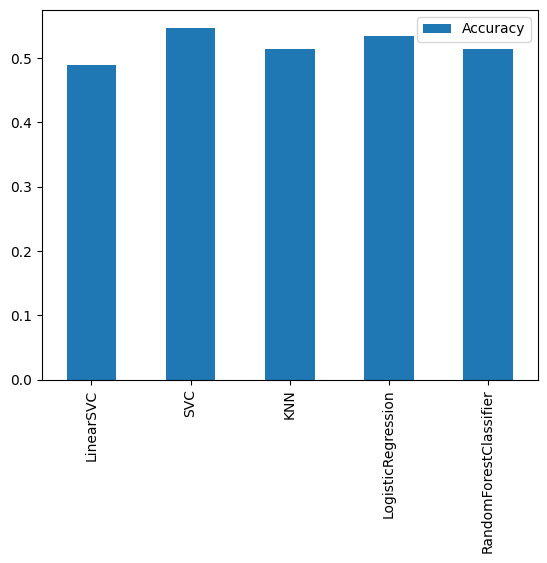

In [204]:
# Create a dataframe of the model results and plot to a chart
results_df = pd.DataFrame(results.values(),
                       results.keys(),
                       columns=['Accuracy'])
results_df.plot.bar();

In [210]:
# Hyperparameter Tuning - (logisticregression)
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)
print('')

# View the best parameters
print(f"Best parameters: {rs_log_reg.best_params_}")
# View the score
print(f"Score: {rs_log_reg.score(X_test, y_test)}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best parameters: {'solver': 'liblinear', 'C': 0.012742749857031334}
Score: 0.5488636363636363


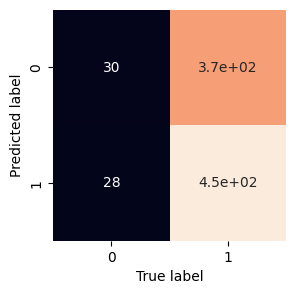

In [211]:
# Instantiate new instance of our model
model = LogisticRegression(solver='liblinear', C=0.012742749857031334)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Make a confusion matrix
confusion_matrix(y_test, y_preds)

# Make a confusion matrix +
def plot_conf_mat(y_test, y_preds):
    """ Plots a confusion matrix using Seaborn's heatmap(). """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [226]:
# Classification Report
print(classification_report(y_test, y_preds))

# Find the precision score of the model
print(f"Precision: {precision_score(y_test, y_preds)}")

# Find the recall score
print(f"Recall: {recall_score(y_test, y_preds)}")

# Find the F1 score
print(f"F1: {f1_score(y_test, y_preds)}")

              precision    recall  f1-score   support

         0.0       0.52      0.08      0.13       399
         1.0       0.55      0.94      0.70       481

    accuracy                           0.55       880
   macro avg       0.53      0.51      0.41       880
weighted avg       0.54      0.55      0.44       880

Precision: 0.551094890510949
Recall: 0.9417879417879418
F1: 0.6953184957789716


In [ ]:
# Use the dump function to export the trained model to file
# dump(model, 'trained-daily.joblib')

# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
# loaded_model = load('trained-daily.joblib')